In [1]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.optimize import minimize
from scipy.stats import truncnorm, norm

%matplotlib inline

rng = np.random.default_rng()

In [2]:
def _create_initial_opt_pt_settings(domain, mean_fraction=2, std_fraction=2):
        _dom_size = domain[1]-domain[0]
        _mean = domain[0] + (_dom_size / mean_fraction)
        _std = _dom_size / std_fraction

        a = (domain[0] - _mean) / _std
        b = (domain[1] - _mean) / _std

        return a, b, _mean, _std
    
def generate_init_pt(a, b, mean, std):
    return truncnorm.rvs(a, b, loc=mean, scale=std)

In [3]:
domain = (5, 500)
dom_size = domain[1] - domain[0]
num_points = 5_000

X = np.linspace(*domain, num=num_points)

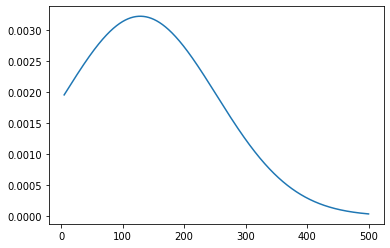

In [4]:
plt.plot(X, norm.pdf(X, loc=(dom_size/4)+domain[0], scale=dom_size/4))
plt.show()

495 128.75


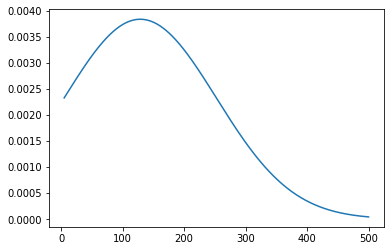

In [5]:
print(dom_size, (dom_size/4)+domain[0])

_mean = (dom_size/4)+domain[0]
_std = dom_size/4
a = (domain[0] - _mean) / _std
b = (domain[1] - _mean) / _std

plt.plot(X, truncnorm.pdf(X, a, b, loc=_mean, scale=_std))
plt.show()

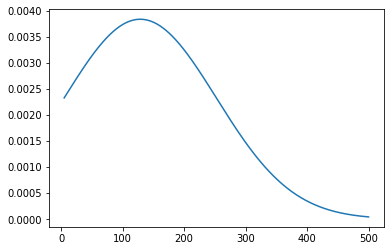

In [6]:
a, b, mean, std = _create_initial_opt_pt_settings(domain, mean_fraction=4, std_fraction=4)

plt.plot(X, truncnorm.pdf(X, a, b, loc=mean, scale=std))
plt.show()

In [7]:
generated_pts = []
for i in range(num_points):
    pt = generate_init_pt(a, b, mean, std)
    generated_pts.append(pt)

# generated_pts

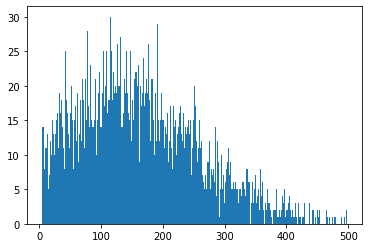

In [8]:
plt.hist(generated_pts, bins=500)
plt.show()